# Práctica 4 (Parte 1): Segmentación (Clustering)

**Una compañía está interesada en realizar la segmentación de sus clientes de tal manera que pueda direccionar y adaptar sus campañas de marketing y fidelización a cada uno de los grupos encontrados.**

+ __Estudiante 1:__
+ __Estudiante 2:__

## **0. Importar las librerías**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme(style="whitegrid")

## **1. Cargar un conjunto de datos tabulares.**

### Mall Customers (Mall_Customers.csv)

https://www.kaggle.com/datasets/vjchoudhary7/customer-segmentation-tutorial-in-python

### Ejercicio 1

Cargue el conjunto de datos Mall_Customers.csv

Indique breve y claramente en que consiste este dataset.

In [2]:
df = pd.read_csv('../data/Mall_Customers.csv')

Este conjunto de datos, "Mall_Customers.csv", se enfoca en información demográfica y de comportamiento de clientes de un centro comercial. Contiene cinco columnas:

CustomerID: ID único para cada cliente.
Gender: Género del cliente.
Age: Edad del cliente.
Annual Income: Ingreso anual del cliente.
Spending Score: Puntuación asignada por el centro comercial basada en el comportamiento del cliente y la cantidad gastada.

## **2. Análisis Exploratorio de los Datos - Limpieza - Preparación**

### Ejercicio 2

- Determine la cantidad de observaciones y atributos.
- Determine los tipos de datos de los atributos e identifique si hay problemas con los tipos de datos o con los nombres de los atributos. En caso de existir implemente una estrategia para tratarlos.
- Previsualice el contenido del dataframe.

In [3]:
df.shape

(200, 5)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [5]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


### Ejercicio 3

- Lleve a cabo un análisis univariado del dataset y consigne sus observaciones. Nota: puede usar histogramas o estadísticas básicas.
- Realice el análisis bivariado del dataset y consigne sus observaciones.

In [6]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


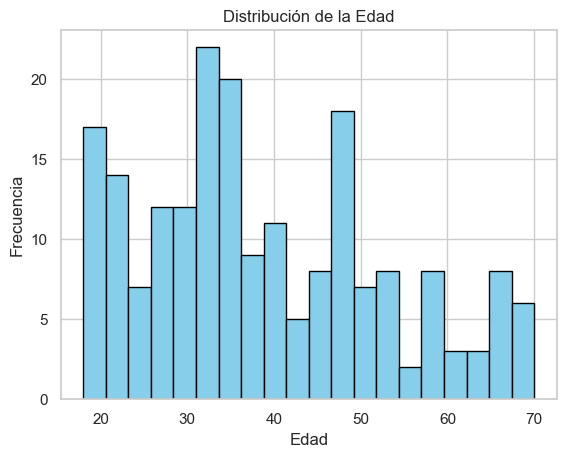

In [7]:
# Histograma de la edad
plt.hist(df['Age'], bins=20, color='skyblue', edgecolor='black')
plt.xlabel('Edad')
plt.ylabel('Frecuencia')
plt.title('Distribución de la Edad')
plt.show()

### Analisis bivariado

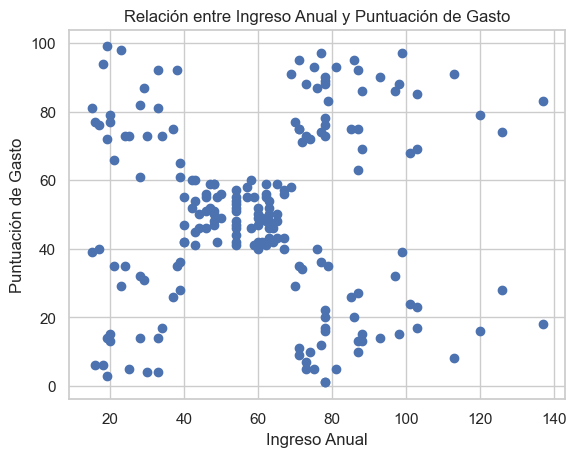

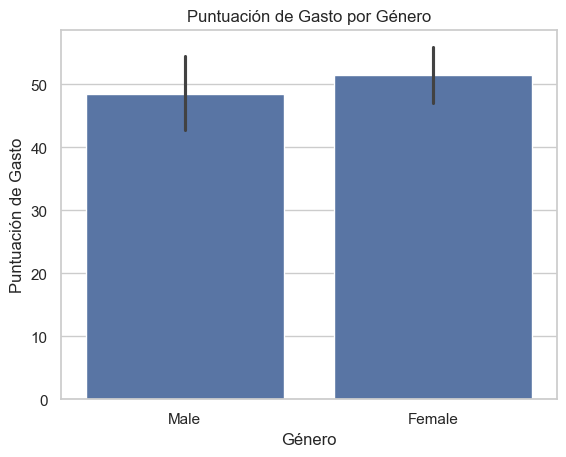

In [11]:
# Gráfico de dispersión de Ingreso Anual vs. Puntuación de Gasto
plt.scatter(df['Annual Income (k$)'], df['Spending Score (1-100)'])
plt.xlabel('Ingreso Anual')
plt.ylabel('Puntuación de Gasto')
plt.title('Relación entre Ingreso Anual y Puntuación de Gasto')
plt.show()

# Gráfico de barras de Género vs. Puntuación de Gasto
sns.barplot(x='Gender', y='Spending Score (1-100)', data=df)
plt.xlabel('Género')
plt.ylabel('Puntuación de Gasto')
plt.title('Puntuación de Gasto por Género')
plt.show()

### Ejercicio 4

- Identifique si hay datos repetidos y datos nulos. En caso de existir implemente una estrategia para tratarlos.
- Identifique si hay outliers. En caso de existir implemente una estrategia para tratarlos.

In [12]:
# Identificar datos duplicados
duplicados = df[df.duplicated()]
print("Cantidad de filas duplicadas:", len(duplicados))

# Eliminar datos duplicados si es necesario
df_sin_duplicados = df.drop_duplicates()

Cantidad de filas duplicadas: 0


In [13]:
# Identificar datos nulos
nulos_por_columna = df.isnull().sum()
print("Valores nulos por columna:")
print(nulos_por_columna)

Valores nulos por columna:
CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64


# 3. Modelo

### Ejercicio 5

Realice la mejor agrupación de los clientes de acuerdo con el Ingreso Anual y el Spending Score. Pruebe diferentes valores de k, normalice si considera necesario y use las diferentes métricas para comparar el desempeño de las agrupaciones.

¿Cuántos grupos encontró? ¿Qué 'insights' se pueden extraer de esta segmentación de los clientes?

In [15]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Normalizar los datos si es necesario
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df[['Annual Income (k$)', 'Spending Score (1-100)']])

# Probar diferentes valores de k y evaluar el rendimiento
for k in range(2, 10):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_data)
    print(f"Para k={k}, Inercia: {kmeans.inertia_}")


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Para k=2, Inercia: 269.6910121927639
Para k=3, Inercia: 157.70400815035947
Para k=4, Inercia: 108.92131661364357
Para k=5, Inercia: 65.56840815571681
Para k=6, Inercia: 55.057348270385994
Para k=7, Inercia: 44.86475569922557
Para k=8, Inercia: 37.228187677585886
Para k=9, Inercia: 32.39226763033116


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.1

In [17]:
# Ajustar K-Means con el número óptimo de grupos
kmeans_optimo = KMeans(n_clusters=5, random_state=42)
kmeans_optimo.fit(scaled_data)

# Obtener las etiquetas de grupo
etiquetas_grupo = kmeans_optimo.labels_

# Agregar las etiquetas al DataFrame original
df['Grupo'] = etiquetas_grupo

# Analizar los grupos
grupo_0 = df[df['Grupo'] == 0]
grupo_1 = df[df['Grupo'] == 1]
# ... y así sucesivamente para cada grupo

# Analizar características de cada grupo
print("Características del Grupo 0:")
print(grupo_0.describe())
print("Características del Grupo 1:")
print(grupo_1.describe())
# ... y así sucesivamente para cada grupo


Características del Grupo 0:
       CustomerID        Age  Annual Income (k$)  Spending Score (1-100)  \
count   81.000000  81.000000           81.000000               81.000000   
mean    86.320988  42.716049           55.296296               49.518519   
std     24.240889  16.447822            8.988109                6.530909   
min     44.000000  18.000000           39.000000               34.000000   
25%     66.000000  27.000000           48.000000               44.000000   
50%     86.000000  46.000000           54.000000               50.000000   
75%    106.000000  54.000000           62.000000               55.000000   
max    143.000000  70.000000           76.000000               61.000000   

       Grupo  
count   81.0  
mean     0.0  
std      0.0  
min      0.0  
25%      0.0  
50%      0.0  
75%      0.0  
max      0.0  
Características del Grupo 1:
       CustomerID        Age  Annual Income (k$)  Spending Score (1-100)  \
count   39.000000  39.000000           39.0000

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


### Ejercicio 6

Realice la mejor agrupación de los clientes de acuerdo con la Edad y el Spending Score. Pruebe diferentes valores de k, normalice si considera necesario y use las diferentes métricas para comparar el desempeño de las agrupaciones.

¿Cuántos grupos encontró? ¿Qué 'insights' se pueden extraer de esta segmentación de los clientes?

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.1

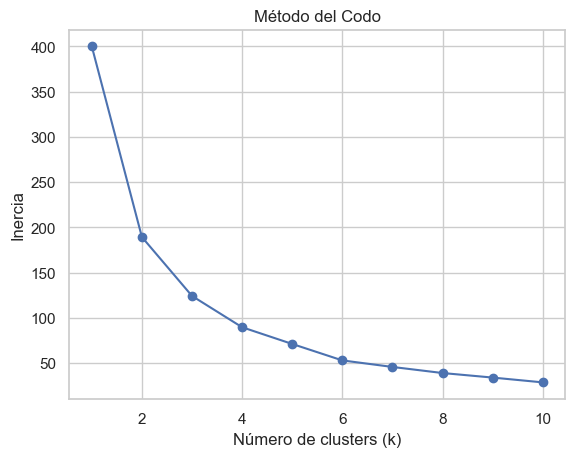

In [18]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Normalizar los datos si es necesario
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df[['Age', 'Spending Score (1-100)']])

# Probar diferentes valores de k y evaluar el rendimiento
inercia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_data)
    inercia.append(kmeans.inertia_)

# Visualización de la inercia para diferentes valores de k
plt.plot(range(1, 11), inercia, marker='o')
plt.xlabel('Número de clusters (k)')
plt.ylabel('Inercia')
plt.title('Método del Codo')
plt.show()

In [19]:
# Ajustar K-Means con el número óptimo de grupos
kmeans_optimo = KMeans(n_clusters=2, random_state=42)
kmeans_optimo.fit(scaled_data)

# Obtener las etiquetas de grupo
etiquetas_grupo = kmeans_optimo.labels_

# Agregar las etiquetas al DataFrame original
df['Grupo_Edad_Spending'] = etiquetas_grupo

# Analizar los grupos
grupo_0 = df[df['Grupo_Edad_Spending'] == 0]
grupo_1 = df[df['Grupo_Edad_Spending'] == 1]
# ... y así sucesivamente para cada grupo

# Analizar características de cada grupo
print("Características del Grupo 0:")
print(grupo_0.describe())
print("Características del Grupo 1:")
print(grupo_1.describe())
# ... y así sucesivamente para cada grupo


Características del Grupo 0:
       CustomerID         Age  Annual Income (k$)  Spending Score (1-100)  \
count  103.000000  103.000000          103.000000              103.000000   
mean    99.543689   48.728155           60.495146               32.184466   
std     55.613649   11.931335           25.217436               17.954598   
min      3.000000   19.000000           16.000000                1.000000   
25%     56.500000   41.000000           43.500000               15.000000   
50%     94.000000   49.000000           60.000000               35.000000   
75%    148.000000   57.500000           77.500000               48.000000   
max    199.000000   70.000000          137.000000               60.000000   

            Grupo  Grupo_Edad_Spending  
count  103.000000                103.0  
mean     1.805825                  0.0  
std      1.732381                  0.0  
min      0.000000                  0.0  
25%      0.000000                  0.0  
50%      3.000000              

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


### Ejercicio 7

Realice la mejor agrupación de los clientes de acuerdo con el Género y el Spending Score. Pruebe diferentes valores de k, normalice si considera necesario y use las diferentes métricas para comparar el desempeño de las agrupaciones.

¿Cuántos grupos encontró? ¿Qué 'insights' se pueden extraer de esta segmentación de los clientes?

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.1

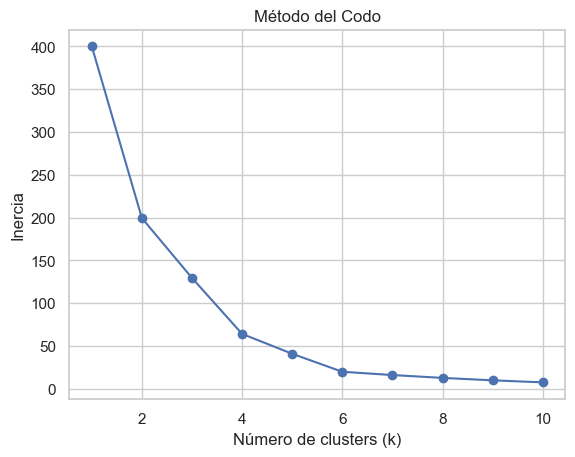

In [22]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

df['Gender'] = df['Gender'].replace({'Male': 0, 'Female': 1})

# Normalizar los datos si es necesario
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df[['Gender', 'Spending Score (1-100)']])

# Probar diferentes valores de k y evaluar el rendimiento
inercia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_data)
    inercia.append(kmeans.inertia_)

# Visualización de la inercia para diferentes valores de k
plt.plot(range(1, 11), inercia, marker='o')
plt.xlabel('Número de clusters (k)')
plt.ylabel('Inercia')
plt.title('Método del Codo')
plt.show()


In [23]:
# Ajustar K-Means con el número óptimo de grupos
kmeans_optimo = KMeans(n_clusters=4, random_state=42)
kmeans_optimo.fit(scaled_data)

# Obtener las etiquetas de grupo
etiquetas_grupo = kmeans_optimo.labels_

# Agregar las etiquetas al DataFrame original
df['Grupo_Genero_Spending'] = etiquetas_grupo

# Analizar los grupos
grupo_0 = df[df['Grupo_Genero_Spending'] == 0]
grupo_1 = df[df['Grupo_Genero_Spending'] == 1]
# ... y así sucesivamente para cada grupo

# Analizar características de cada grupo
print("Características del Grupo 0:")
print(grupo_0.describe())
print("Características del Grupo 1:")
print(grupo_1.describe())
# ... y así sucesivamente para cada grupo


Características del Grupo 0:
       CustomerID  Gender        Age  Annual Income (k$)  \
count   55.000000    55.0  55.000000           55.000000   
mean    99.454545     0.0  38.145455           60.618182   
std     52.497555     0.0  16.029392           24.558691   
min      2.000000     0.0  18.000000           15.000000   
25%     61.500000     0.0  26.500000           46.000000   
50%    100.000000     0.0  33.000000           61.000000   
75%    135.000000     0.0  48.500000           72.000000   
max    200.000000     0.0  70.000000          137.000000   

       Spending Score (1-100)      Grupo  Grupo_Edad_Spending  \
count               55.000000  55.000000            55.000000   
mean                66.290909   0.654545             0.690909   
std                 16.844246   0.750757             0.466378   
min                 43.000000   0.000000             0.000000   
25%                 52.000000   0.000000             0.000000   
50%                 60.000000   0.000000

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


### Ejercicio 8

Realice la mejor una segmentación de clientes usando tres atributos: el Spending Score y otros dos que usted considere interesantes. Pruebe diferentes valores de k, normalice si considera necesario y use las diferentes métricas para comparar el desempeño de las agrupaciones.

¿Cuántos grupos encontró? ¿Qué 'insights' se pueden extraer de esta segmentación de los clientes?

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.1

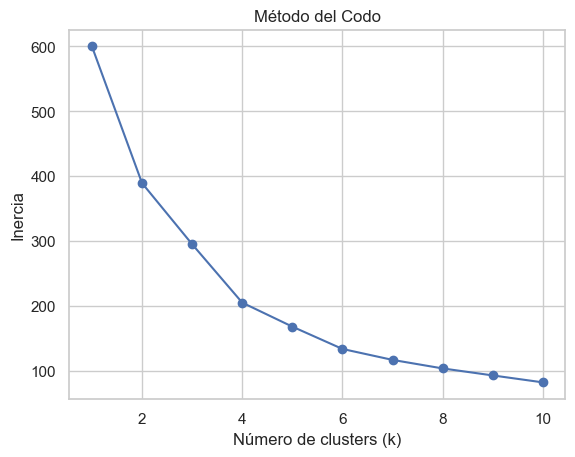

In [24]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Normalizar los datos si es necesario
scaler = StandardScaler()
selected_data = df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']]
scaled_data = scaler.fit_transform(selected_data)

# Probar diferentes valores de k y evaluar el rendimiento
inercia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_data)
    inercia.append(kmeans.inertia_)

# Visualización de la inercia para diferentes valores de k
plt.plot(range(1, 11), inercia, marker='o')
plt.xlabel('Número de clusters (k)')
plt.ylabel('Inercia')
plt.title('Método del Codo')
plt.show()


In [25]:
# Ajustar K-Means con el número óptimo de grupos
kmeans_optimo = KMeans(n_clusters=4, random_state=42)
kmeans_optimo.fit(scaled_data)

# Obtener las etiquetas de grupo
etiquetas_grupo = kmeans_optimo.labels_

# Agregar las etiquetas al DataFrame original
df['Grupo_Tres_Atributos'] = etiquetas_grupo

# Analizar los grupos
grupo_0 = df[df['Grupo_Tres_Atributos'] == 0]
grupo_1 = df[df['Grupo_Tres_Atributos'] == 1]
# ... y así sucesivamente para cada grupo

# Analizar características de cada grupo
print("Características del Grupo 0:")
print(grupo_0.describe())
print("Características del Grupo 1:")
print(grupo_1.describe())
# ... y así sucesivamente para cada grupo


Características del Grupo 0:
       CustomerID     Gender        Age  Annual Income (k$)  \
count   65.000000  65.000000  65.000000           65.000000   
mean    69.415385   0.569231  53.984615           47.707692   
std     34.295541   0.499038   9.418221           14.648723   
min      7.000000   0.000000  35.000000           18.000000   
25%     43.000000   0.000000  48.000000           39.000000   
50%     71.000000   1.000000  52.000000           49.000000   
75%     94.000000   1.000000  63.000000           60.000000   
max    161.000000   1.000000  70.000000           79.000000   

       Spending Score (1-100)      Grupo  Grupo_Edad_Spending  \
count               65.000000  65.000000                 65.0   
mean                39.969231   1.200000                  0.0   
std                 16.405953   1.821744                  0.0   
min                  3.000000   0.000000                  0.0   
25%                 32.000000   0.000000                  0.0   
50%          

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
